# 1. Loading the data

In [49]:
import pandas as pd

def traces(i):
    '''Get detrended traces of dataset @i'''
    return pd.read_csv('data/WBI%s.csv' % i, index_col=0)

def derivs(i):
    '''Get deivatives of dataset @i'''
    return pd.read_csv('data/dWBI%s.csv' % i, index_col=0)

# Some code for later
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

# 2. Data Visualization

## Traces on single dataset

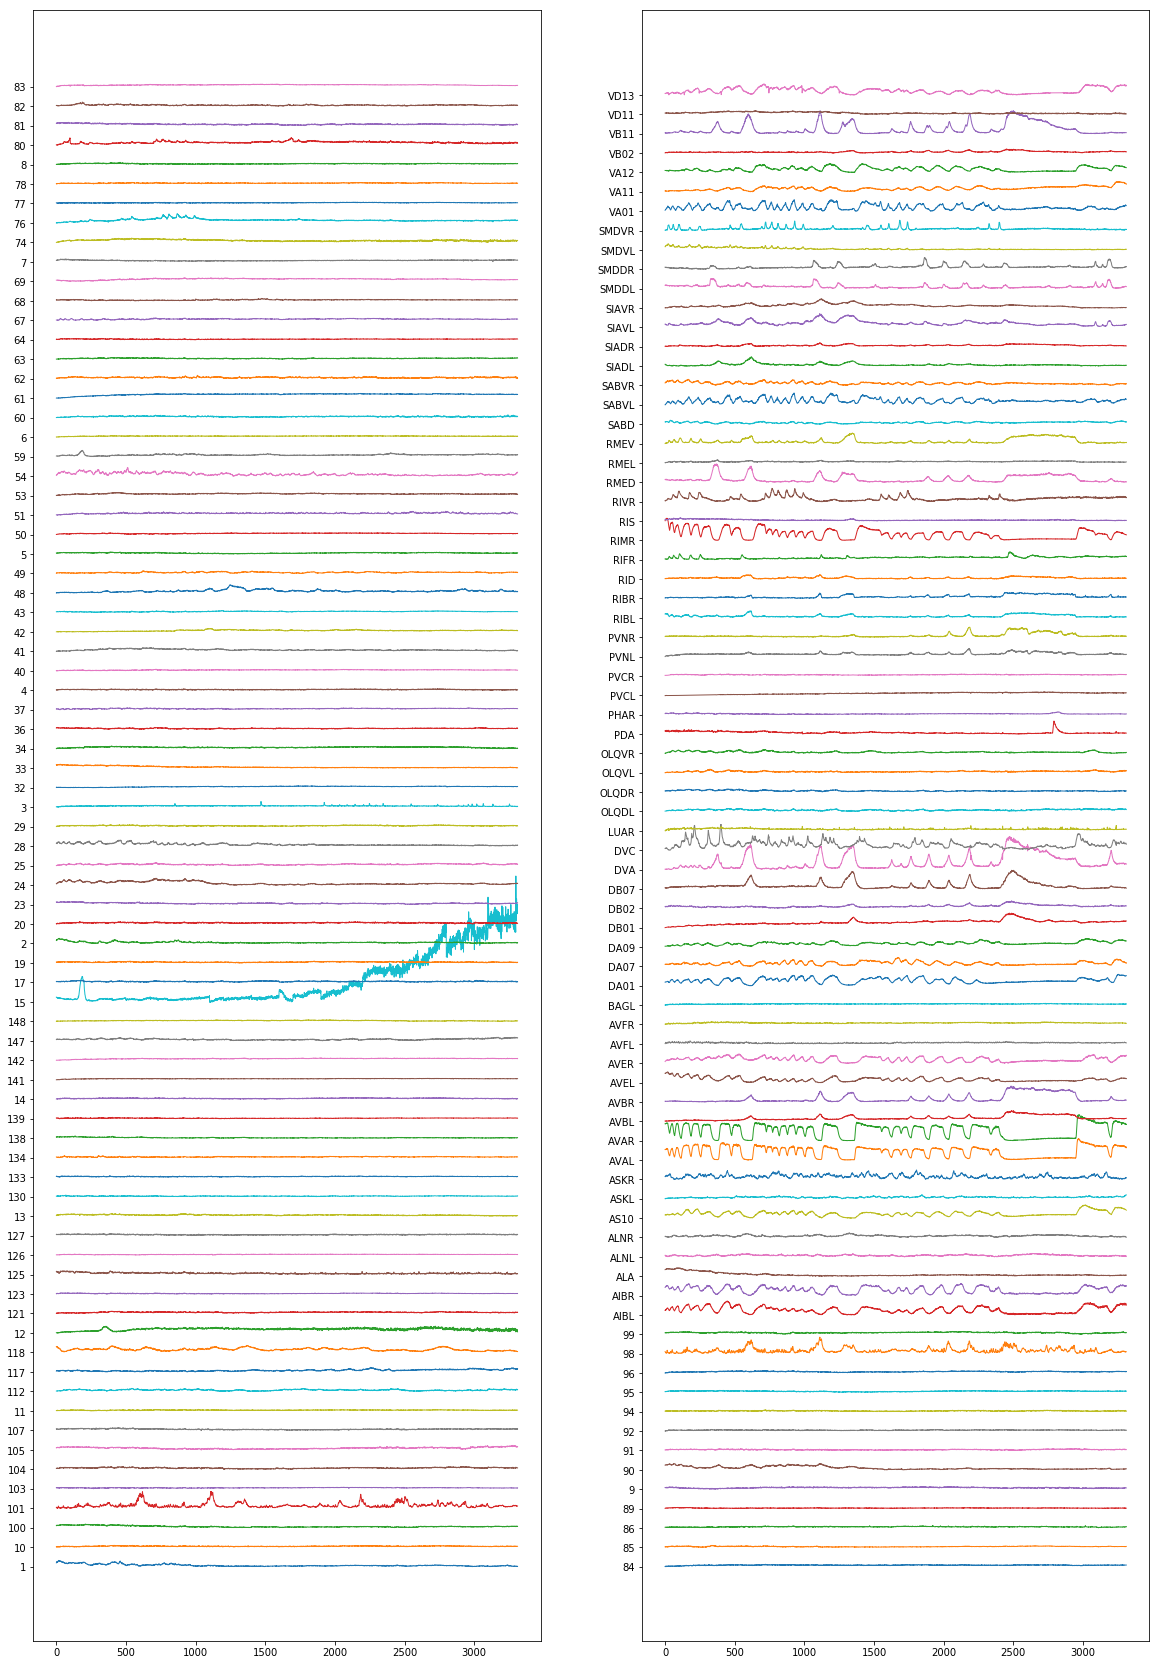

In [54]:
import pylab as plt
import numpy as np

def plot_all_traces(df, scale=False):
    '''Plot all traces of dataset @df'''
    plt.figure(figsize=(20,30))
    if scale:
        df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
    traces = df.values.copy()
    stretch = 2
    N = traces.shape[1]//2
    for i in range(traces.shape[1]):
        traces[:,i] += stretch * (i - N * (i > N-1))
    t1 = traces[:,:N]
    t2 = traces[:,N:]
    plt.subplot(121)
    plt.plot(t1, linewidth=1)
    plt.yticks(np.arange(0,N*stretch,stretch),labels=df.columns[:N])
    plt.subplot(122)
    plt.plot(t2, linewidth=1)
    plt.yticks(np.arange(0,N*stretch,stretch),labels=df.columns[N:])
    plt.show()
    plt.close()
    
    
# Call the function for 1 dataset 
t0 = traces(0)
plot_all_traces(t0)

## Heatmap on single dataset

Run the code below and look at the result.
The heatmap is obviously pretty unreadable, why ?

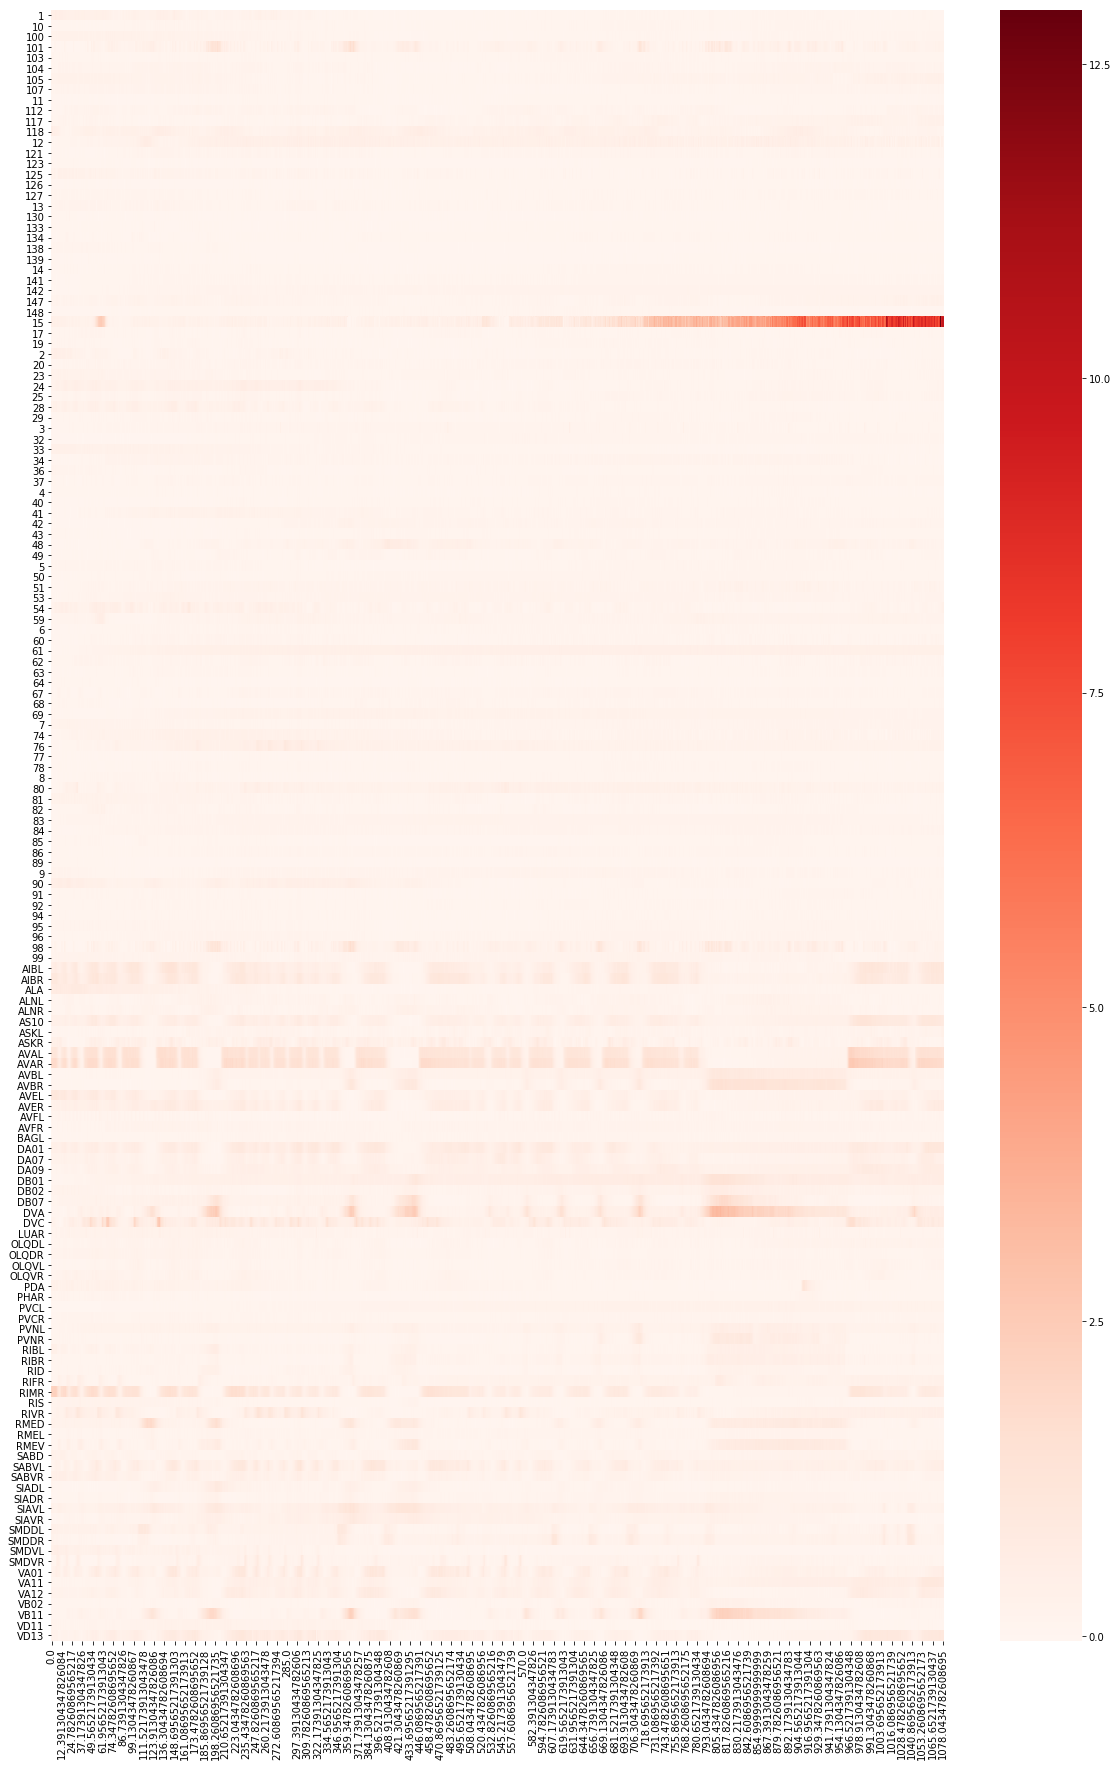

In [64]:
import seaborn as sns

cmaps = ['jet', 'Reds', 'flag']

def heatmap(df, scale=False, cmap='flag'):
    plt.figure(figsize=(20,30))
    if scale:
        df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
    sns.heatmap(df.T, cmap=cmap)
#     plt.plot(t2, linewidth=1)
#     plt.yticks(np.arange(0,N*stretch,stretch),labels=df.columns[N:])
    plt.show()
    plt.close()
    
heatmap(t0, cmap='Reds')

In [53]:
N_sets = 6

all_names = set()
for i in range(N_sets):
    all_names = all_names.union(set(traces(i).columns))
labelled = [n  for n in all_names if any(c.isalpha() for c in n)]
labelled = sorted(labelled)
labelled.remove('bullshit')
labelled.remove('bullshit.1')

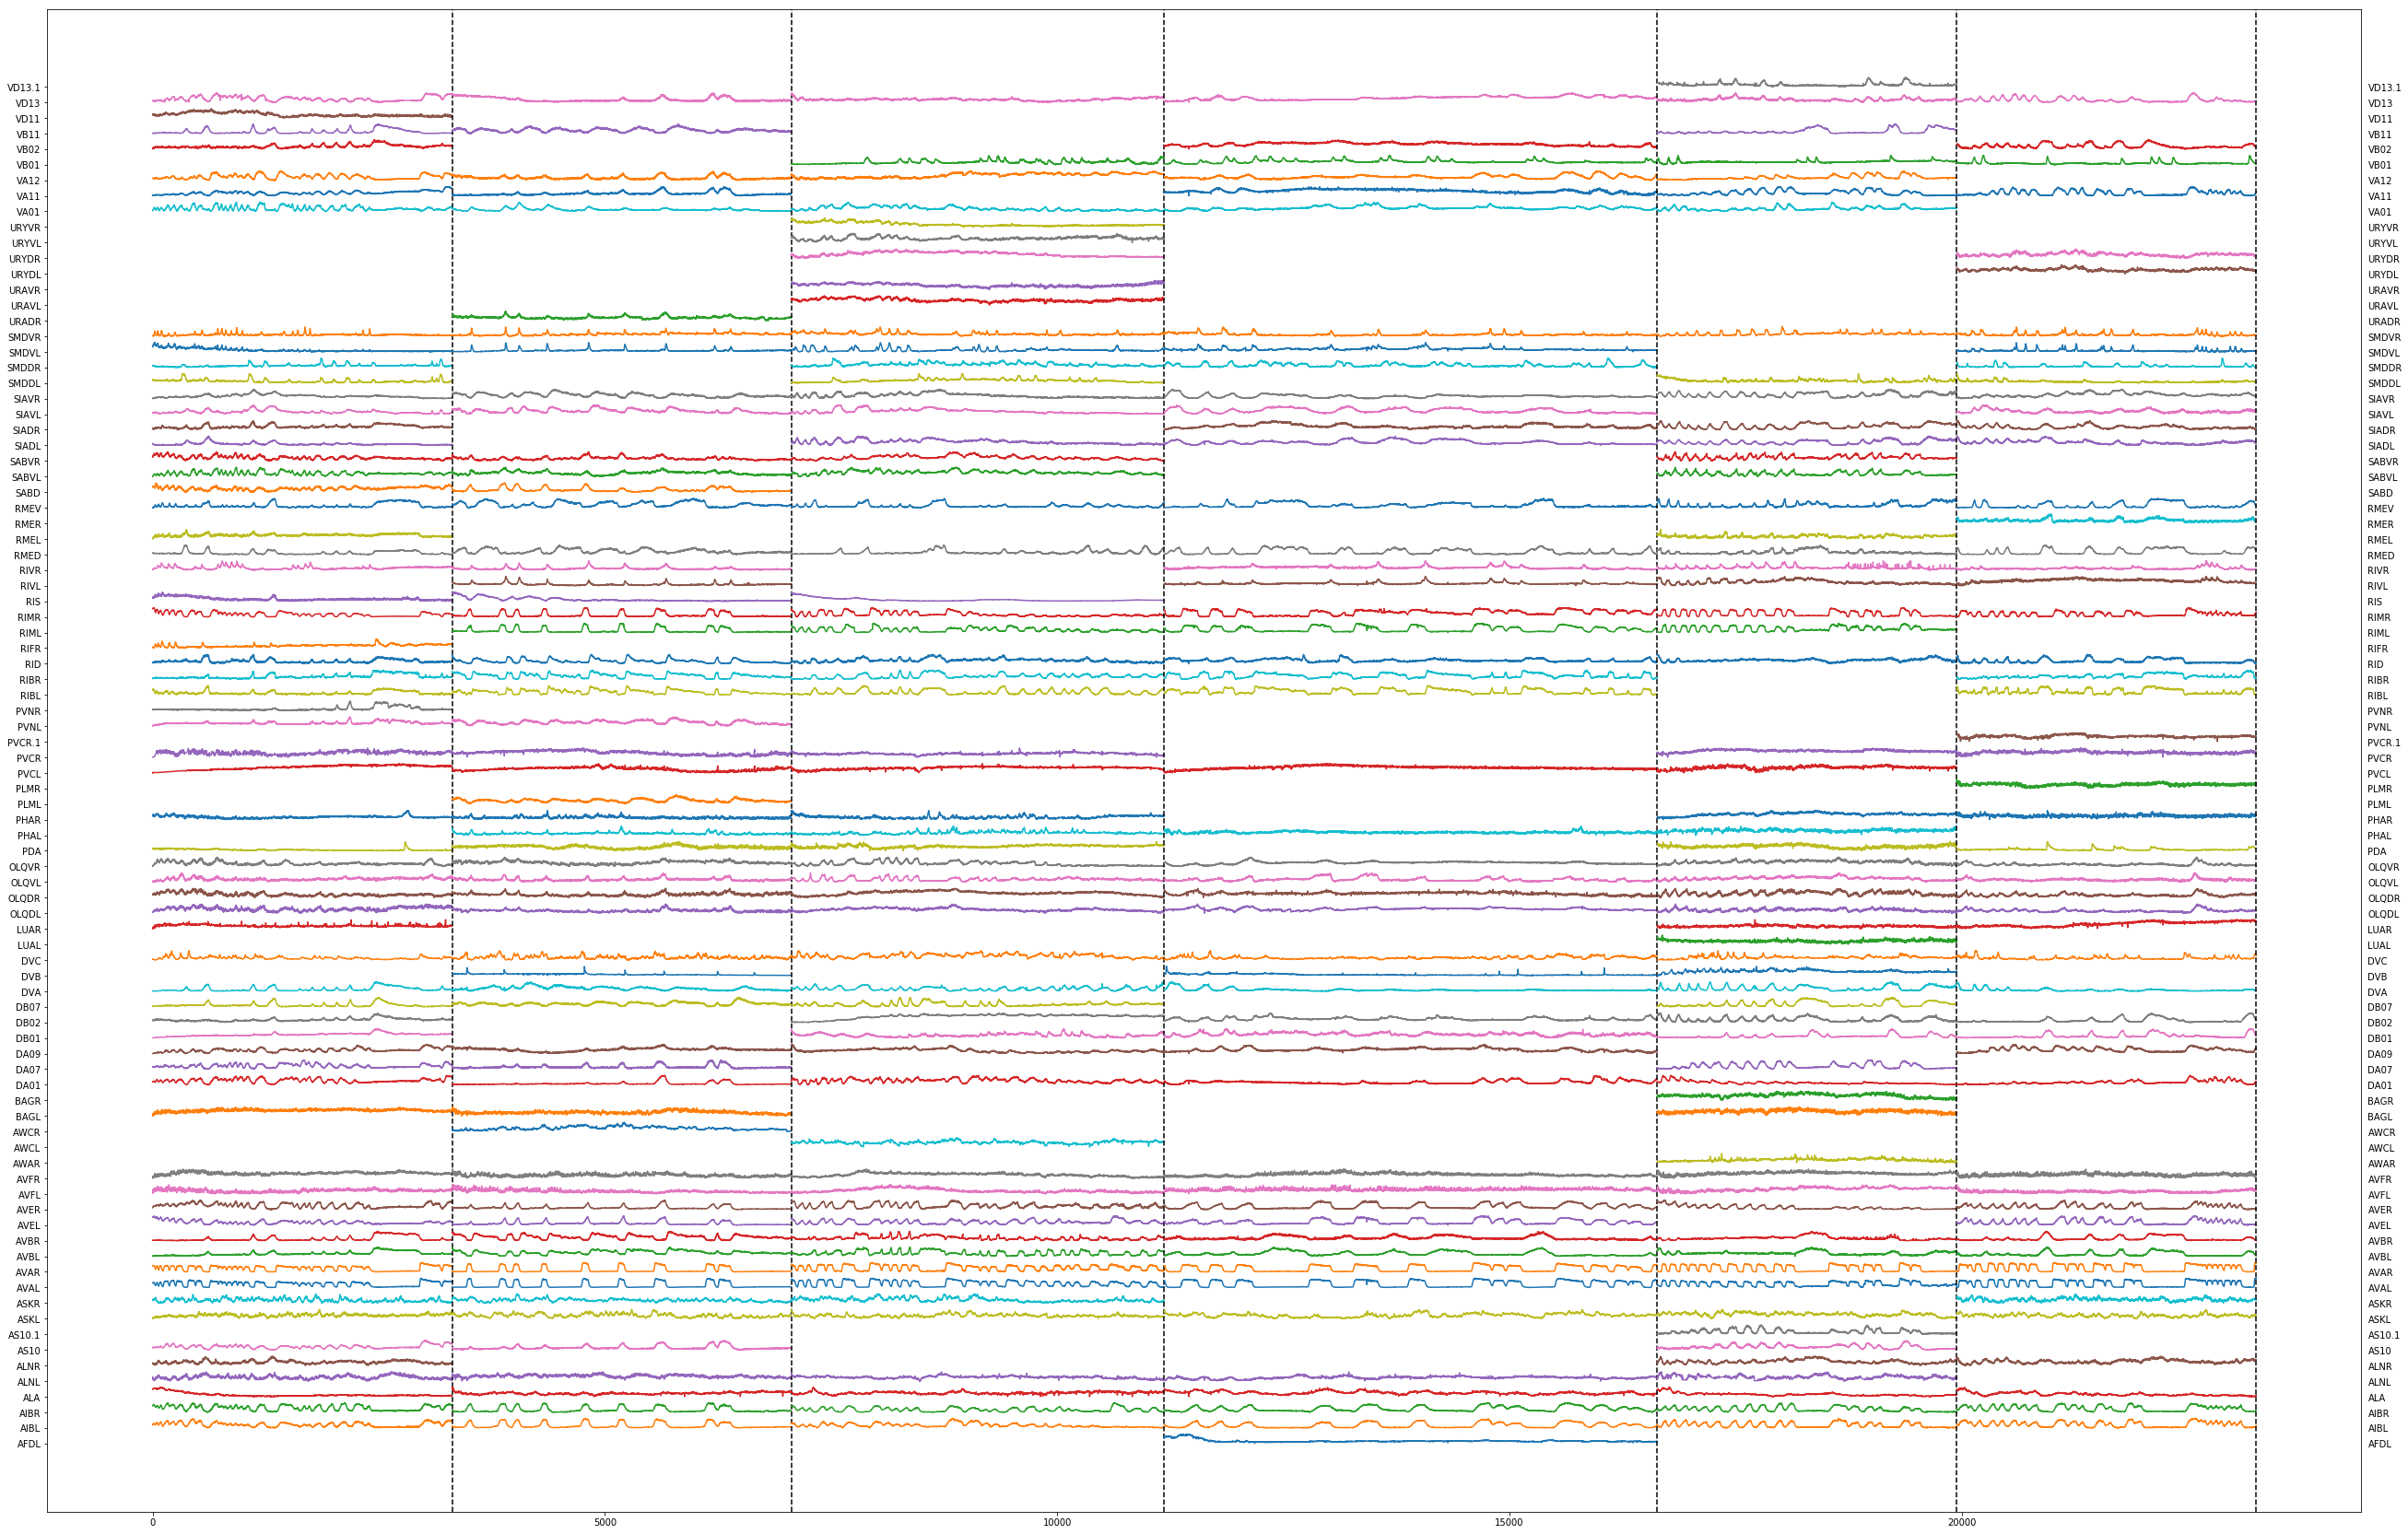

In [39]:
def comp_amp(func, neur=labelled, stretch=1.7, scale=True, title=''):
    '''Plot traces given by @func accross datasets'''
    t = 0
    N = len(neur)
    cmap = plt.cm.get_cmap('tab10')
    plt.figure(figsize=(45,30))
    for i in range(N_sets):
        df = func(i)
        if scale:
            df = pd.DataFrame(scaler.fit_transform(df.values), columns=df.columns, index=df.index)
        for j, n in enumerate(neur):
            try:
                plt.plot(t + df.index, df[n] + j*stretch, color=cmap(j%10))
            except:
                pass
        t += df.index[-1]
        plt.axvline(t, color='k', linestyle='--')
    
    plt.yticks(np.arange(0,N*stretch,stretch),labels=neur)   
    plt.tick_params(labeltop=False, labelright=True)
    plt.title(title, fontsize=20)
    plt.show()
            
comp_amp(traces)

# 3. Analysis